<p style="font-family: Arial; font-size:3.75em;color:purple; font-style:bold"><br>
Pandas</p><br>

*pandas* is a Python library for data analysis. It offers a number of data exploration, cleaning and transformation operations that are critical in working with data in Python. 

*pandas* build upon *numpy* and *scipy* providing easy-to-use data structures and data manipulation functions with integrated indexing.

The main data structures *pandas* provides are *Series* and *DataFrames*. After a brief introduction to these two data structures and data ingestion, the key features of *pandas* this notebook covers are:
* Generating descriptive statistics on data
* Data cleaning using built in pandas functions
* Frequent data operations for subsetting, filtering, insertion, deletion and aggregation of data
* Merging multiple datasets using dataframes
* Working with timestamps and time-series data

**Additional Recommended Resources:**
* *pandas* Documentation: http://pandas.pydata.org/pandas-docs/stable/
* *Python for Data Analysis* by Wes McKinney
* *Python Data Science Handbook* by Jake VanderPlas

Let's get started with our first *pandas* notebook!

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>

Import Libraries
</p>

In [235]:
import pandas as pd

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Introduction to pandas Data Structures</p>
<br>
*pandas* has two main data structures it uses, namely, *Series* and *DataFrames*. 

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas Series</p>

*pandas Series* one-dimensional labeled array. 


In [236]:
ser = pd.Series([100, 'foo', 300, 'bar', 500], ['tom', 'bob', 'nancy', 'dan', 'eric'])

In [237]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [238]:
ser.index

Index(['tom', 'bob', 'nancy', 'dan', 'eric'], dtype='object')

In [240]:
type(ser.loc[['nancy','bob']])

pandas.core.series.Series

In [241]:
ser[[4, 3, 1]]

eric    500
dan     bar
bob     foo
dtype: object

In [242]:
ser.iloc[2]

300

In [243]:
'bob' in ser

True

In [244]:
ser

tom      100
bob      foo
nancy    300
dan      bar
eric     500
dtype: object

In [245]:
ser * 2

tom         200
bob      foofoo
nancy       600
dan      barbar
eric       1000
dtype: object

In [246]:
'hello'*2

'hellohello'

In [248]:
ser[['nancy', 'eric']] ** 2

nancy     90000
eric     250000
dtype: object

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
pandas DataFrame</p>

*pandas DataFrame* is a 2-dimensional labeled data structure.

<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from dictionary of Python Series</p>

In [249]:
d = {'one' : pd.Series([100., 200., 300.], index=['apple', 'ball', 'clock']),
     'two' : pd.Series([111., 222., 333., 4444.], index=['apple', 'ball', 'cerill', 'dancy'])}

In [250]:
df = pd.DataFrame(d)
print(df)

          one     two
apple   100.0   111.0
ball    200.0   222.0
cerill    NaN   333.0
clock   300.0     NaN
dancy     NaN  4444.0


In [251]:
df.index

Index(['apple', 'ball', 'cerill', 'clock', 'dancy'], dtype='object')

In [252]:
df.columns

Index(['one', 'two'], dtype='object')

In [253]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'])

,one,two
dancy,NaN,4444.0
ball,200.0,222.0
apple,100.0,111.0


In [254]:
pd.DataFrame(d, index=['dancy', 'ball', 'apple'], columns=['two', 'five'])

,two,five
dancy,4444.0,NaN
ball,222.0,NaN
apple,111.0,NaN


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Create DataFrame from list of Python dictionaries</p>

In [256]:
data = [{'alex': 1, 'joe': 2}, {'ema': 5, 'dora': 10, 'alice': 20}]

In [257]:
pd.DataFrame(data)

,alex,joe,ema,dora,alice
0,1.0,2.0,NaN,NaN,NaN
1,NaN,NaN,5.0,10.0,20.0


In [259]:
pd.DataFrame(data, index=['orange', 'red'])

,alex,joe,ema,dora,alice
orange,1.0,2.0,NaN,NaN,NaN
red,NaN,NaN,5.0,10.0,20.0


In [260]:
pd.DataFrame(data, columns=['joe', 'dora','alice'])

,joe,dora,alice
0,2.0,NaN,NaN
1,NaN,10.0,20.0


<p style="font-family: Arial; font-size:1.25em;color:#2462C0; font-style:bold">
Basic DataFrame operations</p>

In [261]:
df

,one,two
apple,100.0,111.0
ball,200.0,222.0
cerill,NaN,333.0
clock,300.0,NaN
dancy,NaN,4444.0


In [263]:
type(df['one'])

pandas.core.series.Series

In [266]:
df['threewetr'] = df['one'] * 2
df

,one,two,thfourree,three,threewetr
apple,100.0,111.0,400.0,11100.0,200.0
ball,200.0,222.0,800.0,44400.0,400.0
cerill,NaN,333.0,NaN,NaN,NaN
clock,300.0,NaN,1200.0,NaN,600.0
dancy,NaN,4444.0,NaN,NaN,NaN


In [267]:
df['flag'] = df['one'] > 250
df

,one,two,thfourree,three,threewetr,flag
apple,100.0,111.0,400.0,11100.0,200.0,False
ball,200.0,222.0,800.0,44400.0,400.0,False
cerill,NaN,333.0,NaN,NaN,NaN,False
clock,300.0,NaN,1200.0,NaN,600.0,True
dancy,NaN,4444.0,NaN,NaN,NaN,False


In [269]:
three = df.pop('three')

KeyError: 'three'

In [270]:
three

apple     11100.0
ball      44400.0
cerill        NaN
clock         NaN
dancy         NaN
Name: three, dtype: float64

In [271]:
df

,one,two,thfourree,threewetr,flag
apple,100.0,111.0,400.0,200.0,False
ball,200.0,222.0,800.0,400.0,False
cerill,NaN,333.0,NaN,NaN,False
clock,300.0,NaN,1200.0,600.0,True
dancy,NaN,4444.0,NaN,NaN,False


In [272]:
del df['two']

In [ ]:
df

In [273]:
df.insert(2, 'copy_of_one', df['one'])
df

,one,thfourree,copy_of_one,threewetr,flag
apple,100.0,400.0,100.0,200.0,False
ball,200.0,800.0,200.0,400.0,False
cerill,NaN,NaN,NaN,NaN,False
clock,300.0,1200.0,300.0,600.0,True
dancy,NaN,NaN,NaN,NaN,False


In [274]:
df['one_upper_half'] = df['one'][:2]
df

,one,thfourree,copy_of_one,threewetr,flag,one_upper_half
apple,100.0,400.0,100.0,200.0,False,100.0
ball,200.0,800.0,200.0,400.0,False,200.0
cerill,NaN,NaN,NaN,NaN,False,NaN
clock,300.0,1200.0,300.0,600.0,True,NaN
dancy,NaN,NaN,NaN,NaN,False,NaN


<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Case Study: Movie Data Analysis</p>
<br>This notebook uses a dataset from the MovieLens website. We will describe the dataset further as we explore with it using *pandas*. 

## Download the Dataset

Please note that **you will need to download the dataset**. Although the video for this notebook says that the data is in your folder, the folder turned out to be too large to fit on the edX platform due to size constraints.

Here are the links to the data source and location:
* **Data Source:** MovieLens web site (filename: ml-20m.zip)
* **Location:** https://grouplens.org/datasets/movielens/

Once the download completes, please make sure the data files are in a directory called *movielens* in your *Week-3-pandas* folder. 

Let us look at the files in this dataset using the UNIX command ls.


In [1]:
# Note: Adjust the name of the folder to match your local directory

!ls ../data/movielens_data

README.txt        genome-tags.csv   ml-25m.zip        ratings.csv
genome-scores.csv links.csv         movies.csv        tags.csv


In [276]:
!cat ../data/movielens_data/movies.csv | wc -l

   62424


In [2]:
!head -5 ../data/movielens_data/ratings.csv

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold">
Use Pandas to Read the Dataset<br>
</p>
<br>
In this notebook, we will be using three CSV files:
* **ratings.csv :** *userId*,*movieId*,*rating*, *timestamp*
* **tags.csv :** *userId*,*movieId*, *tag*, *timestamp*
* **movies.csv :** *movieId*, *title*, *genres* <br>

Using the *read_csv* function in pandas, we will ingest these three files.

In [3]:
movies = pd.read_csv('../data/movielens_data/movies.csv', sep=',')
print(type(movies))
movies.head(15)

NameError: name 'pd' is not defined

In [280]:
# Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970

tags = pd.read_csv('../data/movielens_data/tags.csv', sep=',')
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [281]:
ratings = pd.read_csv('../data/movielens_data/ratings.csv', sep=',', parse_dates=['timestamp'])
ratings.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [284]:
ratings.columns


Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [ ]:
# For current analysis, we will remove timestamp (we will come back to it!)

del ratings['timestamp']
del tags['timestamp']

<h1 style="font-size:2em;color:#2467C0">Data Structures </h1>

<h1 style="font-size:1.5em;color:#2467C0">Series</h1>

In [285]:
#Extract 0th row: notice that it is infact a Series

row_0 = tags.iloc[0]
type(row_0)

pandas.core.series.Series

In [ ]:
print(row_0)

In [286]:
'userId' in row_0.index

True

In [287]:
row_0['userId']

3

In [ ]:
'rating' in row_0

In [288]:
row_0.name

0

In [289]:
row_0 = row_0.rename('first_row')
row_0.name

'first_row'

<h1 style="font-size:1.5em;color:#2467C0">DataFrames </h1>

In [290]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [291]:
tags.index

RangeIndex(start=0, stop=1093360, step=1)

In [292]:
tags.columns

Index(['userId', 'movieId', 'tag', 'timestamp'], dtype='object')

In [293]:
# Extract row 0, 11, 2000 from DataFrame

tags.iloc[ [0,11,2000] ]

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
11,4,164909,cliche,1573943721
2000,647,164179,twist ending,1505599624


<h1 style="font-size:2em;color:#2467C0">Descriptive Statistics</h1>

Let's look how the ratings are distributed! 

In [294]:
ratings['rating'].describe()

count    2.500010e+07
mean     3.533854e+00
std      1.060744e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

In [295]:
type(ratings['rating'])

pandas.core.series.Series

In [296]:
ratings.describe()

,userId,movieId,rating
count,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00
std,4.679172e+04,3.919886e+04,1.060744e+00
min,1.000000e+00,1.000000e+00,5.000000e-01
25%,4.051000e+04,1.196000e+03,3.000000e+00
50%,8.091400e+04,2.947000e+03,3.500000e+00
75%,1.215570e+05,8.623000e+03,4.000000e+00
max,1.625410e+05,2.091710e+05,5.000000e+00


In [ ]:
ratings['rating'].mean()

In [ ]:
ratings.mean()

In [ ]:
ratings['rating'].min()

In [ ]:
ratings['rating'].max()

In [ ]:
ratings['rating'].std()

In [ ]:
ratings['rating'].mode()

In [297]:
ratings.corr()

<ipython-input-297-b7290e7225e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ratings.corr()


,userId,movieId,rating
userId,1.000000,-0.004413,0.001940
movieId,-0.004413,1.000000,-0.009216
rating,0.001940,-0.009216,1.000000


In [298]:
filter_1 = ratings['rating'] > 5
print(filter_1)
filter_1.any()

0           False
1           False
2           False
3           False
4           False
            ...  
25000090    False
25000091    False
25000092    False
25000093    False
25000094    False
Name: rating, Length: 25000095, dtype: bool


False

In [299]:
filter_2 = ratings['rating'] > 0
filter_2.all()

True

<h1 style="font-size:2em;color:#2467C0">Data Cleaning: Handling Missing Data</h1>

In [300]:
movies.shape

(62423, 3)

In [301]:
#is any row NULL ?

movies.isnull().any()

movieId    False
title      False
genres     False
dtype: bool

Thats nice ! No NULL values !

In [302]:
ratings.shape

(25000095, 4)

In [303]:
#is any row NULL ?

ratings.isnull().any()

userId       False
movieId      False
rating       False
timestamp    False
dtype: bool

Thats nice ! No NULL values !

In [304]:
tags.shape

(1093360, 4)

In [305]:
#is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag           True
timestamp    False
dtype: bool

We have some tags which are NULL.

In [306]:
tags = tags.dropna()

In [307]:
#Check again: is any row NULL ?

tags.isnull().any()

userId       False
movieId      False
tag          False
timestamp    False
dtype: bool

In [308]:
tags.shape

(1093344, 4)

Thats nice ! No NULL values ! Notice the number of lines have reduced.

<h1 style="font-size:2em;color:#2467C0">Data Visualization</h1>

array([[<Axes: title={'center': 'rating'}>]], dtype=object)

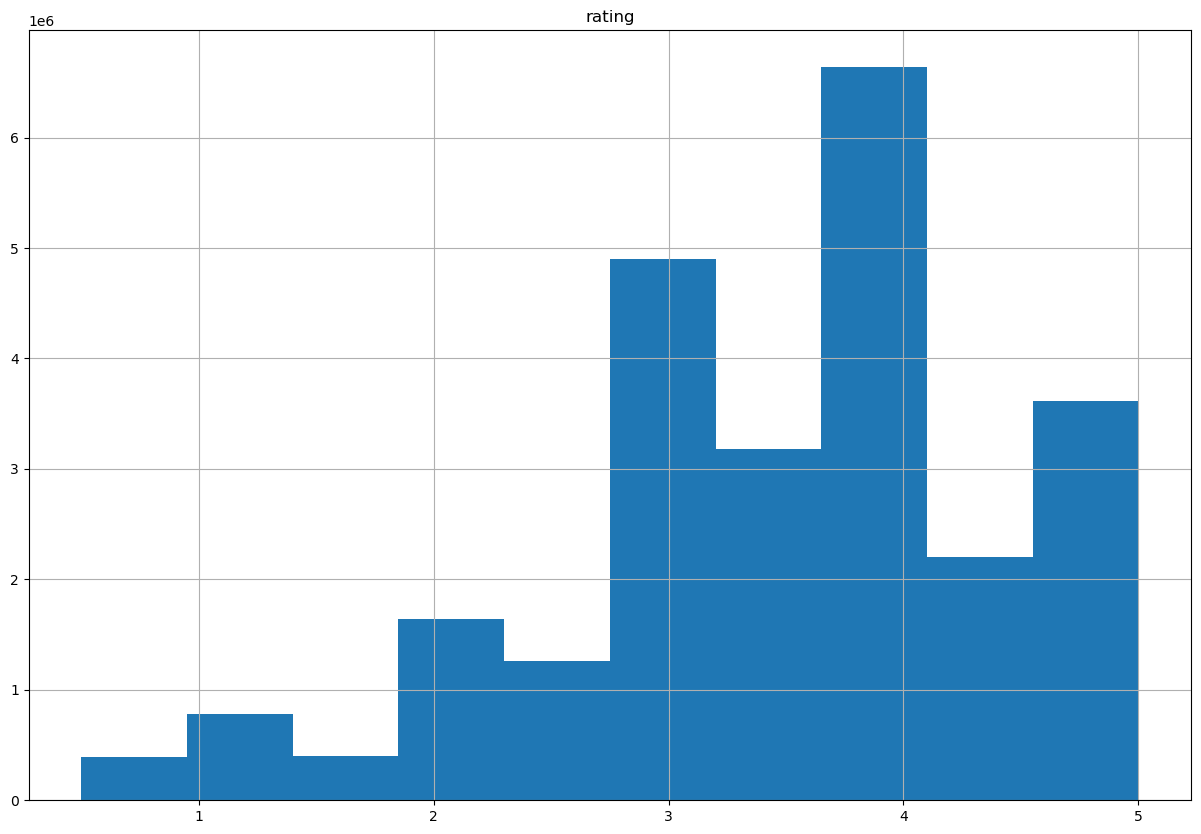

In [309]:
%matplotlib inline

ratings.hist(column='rating', figsize=(15,10))

<Axes: >

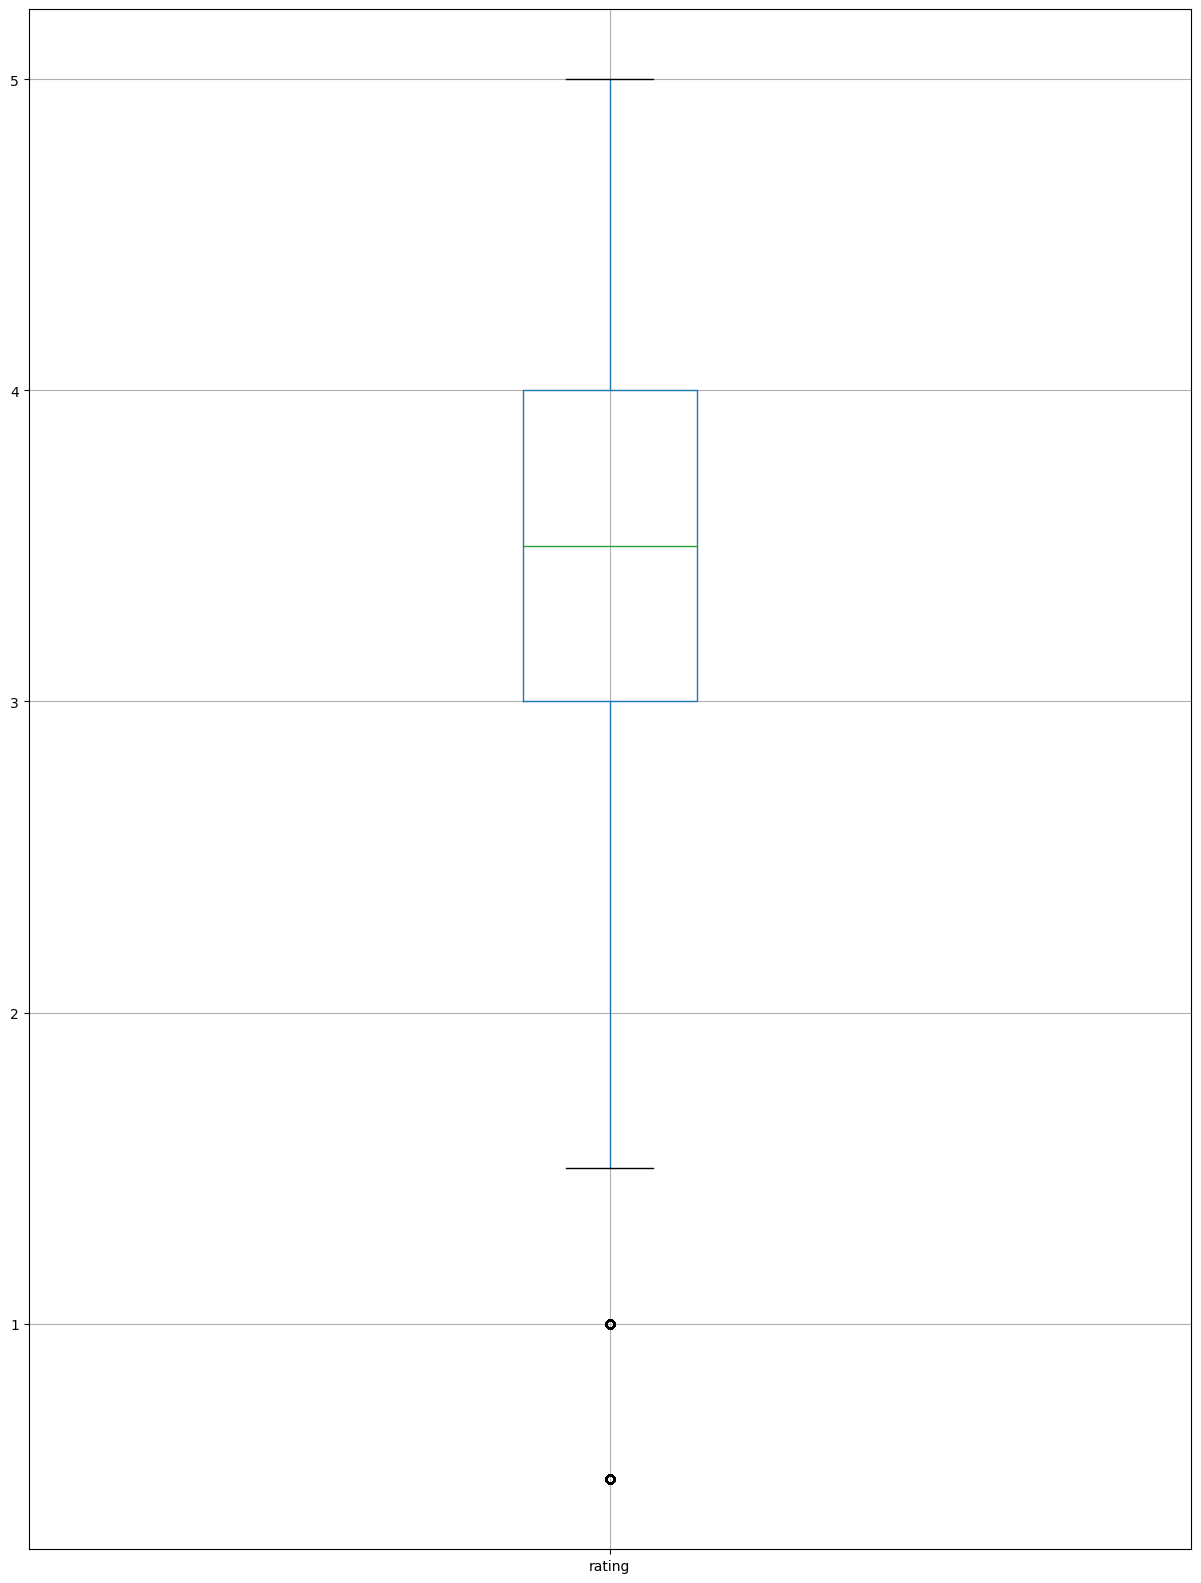

In [310]:
ratings.boxplot(column='rating', figsize=(15,20))

<h1 style="font-size:2em;color:#2467C0">Slicing Out Columns</h1>
 

In [ ]:
tags['tag'].head(10)

In [311]:
movies[['title','genres']].head()

,title,genres
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,Jumanji (1995),Adventure|Children|Fantasy
2,Grumpier Old Men (1995),Comedy|Romance
3,Waiting to Exhale (1995),Comedy|Drama|Romance
4,Father of the Bride Part II (1995),Comedy


In [312]:
ratings[-10:]

,userId,movieId,rating,timestamp
25000085,162541,8983,4.5,1240953211
25000086,162541,31658,4.5,1240953287
25000087,162541,33794,4.0,1240951792
25000088,162541,41566,4.0,1240952749
25000089,162541,45517,4.5,1240953353
25000090,162541,50872,4.5,1240953372
25000091,162541,55768,2.5,1240951998
25000092,162541,56176,2.0,1240950697
25000093,162541,58559,4.0,1240953434
25000094,162541,63876,5.0,1240952515


In [313]:
tag_counts = tags['tag'].value_counts()
tag_counts[-10:]

driving lessons                 1
actually filmed in Pittsburg    1
fake New York settings          1
haunted farm                    1
filmed in Budapest              1
teen sleuth                     1
evil twins                      1
paternity test                  1
QVC                             1
cornetto triolgy                1
Name: tag, dtype: int64

In [ ]:
tag_counts[:10].plot(kind='bar', figsize=(15,10))

<h1 style="font-size:2em;color:#2467C0">Filters for Selecting Rows</h1>

In [314]:
is_highly_rated = ratings['rating'] >= 4.0

ratings[is_highly_rated][30:50]

,userId,movieId,rating,timestamp
49,1,7365,4.0,1147869033
54,1,7940,4.5,1147877967
56,1,8154,5.0,1147868865
57,1,8327,5.0,1147879375
58,1,8360,4.0,1147868682
62,1,8786,4.0,1147877853
64,1,8973,4.0,1147869211
66,1,27266,4.5,1147879365
69,1,32591,5.0,1147879538
72,2,110,5.0,1141416589


In [ ]:
is_animation = movies['genres'].str.contains('Animation')

movies[is_animation][5:15]

In [ ]:
movies[is_animation].head(15)

<h1 style="font-size:2em;color:#2467C0">Group By and Aggregate </h1>

In [315]:
ratings_count = ratings[['movieId','rating']].groupby('rating').count()
ratings_count

,movieId
rating,
0.5,393068
1.0,776815
1.5,399490
2.0,1640868
2.5,1262797
3.0,4896928
3.5,3177318
4.0,6639798
4.5,2200539


In [316]:
average_rating = ratings[['movieId','rating']].groupby('movieId').mean()
average_rating.head()

,rating
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


In [317]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.head()

,rating
movieId,
1,57309
2,24228
3,11804
4,2523
5,11714


In [ ]:
movie_count = ratings[['movieId','rating']].groupby('movieId').count()
movie_count.tail()

<h1 style="font-size:2em;color:#2467C0">Merge Dataframes</h1>

In [ ]:
tags.head()

In [ ]:
movies.head()

In [ ]:
t = movies.merge(tags, on='movieId', how='inner')
t.head()

More examples: http://pandas.pydata.org/pandas-docs/stable/merging.html

<p style="font-family: Arial; font-size:1.75em;color:#2462C0; font-style:bold"><br>


Combine aggreagation, merging, and filters to get useful analytics
</p>

In [ ]:
avg_ratings = ratings.groupby('movieId', as_index=False).mean()
del avg_ratings['userId']
avg_ratings.head()

In [ ]:
box_office = movies.merge(avg_ratings, on='movieId', how='inner')
box_office.tail()

In [ ]:
is_highly_rated = box_office['rating'] >= 4.0

box_office[is_highly_rated][-5:]

In [ ]:
is_comedy = box_office['genres'].str.contains('Comedy')

box_office[is_comedy][:5]

In [ ]:
box_office[is_comedy & is_highly_rated][-5:]

<h1 style="font-size:2em;color:#2467C0">Vectorized String Operations</h1>


In [ ]:
movies.head()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Split 'genres' into multiple columns

<br> </p>

In [ ]:
movie_genres = movies['genres'].str.split('|', expand=True)

In [ ]:
type(movie_genres)

In [ ]:
movie_genres[:11]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Add a new column for comedy genre flag

<br> </p>

In [ ]:
movie_genres['isComedy'] = movies['genres'].str.contains('Comedy')

In [ ]:
movie_genres[:10]

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

Extract year from title e.g. (1995)

<br> </p>

In [ ]:
movies['year'] = movies['title'].str.extract('.*\((.*)\).*', expand=True)

In [ ]:
movies.tail()

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold"><br>

More here: http://pandas.pydata.org/pandas-docs/stable/text.html#text-string-methods
<br> </p>

<h1 style="font-size:2em;color:#2467C0">Parsing Timestamps</h1>

Timestamps are common in sensor data or other time series datasets.
Let us revisit the *tags.csv* dataset and read the timestamps!


In [320]:
tags = pd.read_csv('./movielens_data/tags.csv', sep=',',  parse_dates=['timestamp'])

In [321]:
tags.dtypes

userId        int64
movieId       int64
tag          object
timestamp    object
dtype: object

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Unix time / POSIX time / epoch time records 
time in seconds <br> since midnight Coordinated Universal Time (UTC) of January 1, 1970
</p>

In [322]:
tags.head(5)

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [323]:
tags['parsed_time'] = pd.to_datetime(tags['timestamp'], unit='s')

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Data Type datetime64[ns] maps to either <M8[ns] or >M8[ns] depending on the hardware

</p>

In [324]:

tags['parsed_time'].dtype

dtype('<M8[ns]')

In [325]:
tags.head(2)

,userId,movieId,tag,timestamp,parsed_time
0,3,260,classic,1439472355,2015-08-13 13:25:55
1,3,260,sci-fi,1439472256,2015-08-13 13:24:16


<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Selecting rows based on timestamps
</p>

In [ ]:
greater_than_t = tags['parsed_time'] > '2015-02-01'

selected_rows = tags[greater_than_t]

tags.shape, selected_rows.shape

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Sorting the table using the timestamps
</p>

In [ ]:
tags.sort_values(by='parsed_time', ascending=True)[:10]

<h1 style="font-size:2em;color:#2467C0">Average Movie Ratings over Time </h1>
## Are Movie ratings related to the year of launch?

In [ ]:
average_rating = ratings[['movieId','rating']].groupby('movieId', as_index=False).mean()
average_rating.tail()

In [ ]:
joined = movies.merge(average_rating, on='movieId', how='inner')
joined.head()
joined.corr()

In [ ]:
yearly_average = joined[['year','rating']].groupby('year', as_index=False).mean()
yearly_average[:10]

In [ ]:
yearly_average[-20:].plot(x='year', y='rating', figsize=(15,10), grid=True)

<p style="font-family: Arial; font-size:1.35em;color:#2462C0; font-style:bold">

Do some years look better for the boxoffice movies than others? <br><br>

Does any data point seem like an outlier in some sense?

</p>